In [ ]:
# imports here
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---
#### CS 260 Final Project - SP23
---

# Mental Health in College Students

### By: Nathaniel Gordon, Jonathan Eudja, Colin Rehnert


---

## 1. Introduction

For this project, our group explored the academic and social status of college students and what kinds of mental health issues they have.

---

## 2. Data

A direct link to the data can be found at the following website.
 * https://www.kaggle.com/datasets/shariful07/student-mental-health


According to the website, this data was collected by Google Forms in July 2020 by 101 students asking them about their academic and mental health status. The author states that the survey took place at the International Islamic University Malaysia. This information can be found under the discussion tab on our dataset's webpage.

In [ ]:
#In this cell, we load the data.
try:
    csv_data = pd.read_csv("https://raw.githubusercontent.com/jjthisguy/mental_health/main/updated_mental_health.csv")
    csv_data_temp = pd.read_csv("https://raw.githubusercontent.com/colinrehnert/Join-Data/main/Student_%20Mental_%20Health_%20Analysis.csv")

    conn = sql.connect('mental_health.db')

    csv_data.to_sql('mental_health', conn, index = False)
    csv_data_temp.to_sql('temp', conn, index = False)

except ValueError:
    print("""A ValueError occurred. If you've run this cell twice,
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.""")

A ValueError occurred. If you've run this cell twice, 
             then you're likely getting the error because the DB was created the first time
             and Python doesn't want to overwrite it the second time.


In [ ]:
#Show the rows of the table.
sql_statement = """SELECT *
                   FROM mental_health"""

results = pd.read_sql_query(sql_statement, conn)
results

,date,time,date_time,gender,age,major,current_year,gpa_range,martial_status,depression,anxiety,panic_attacks,Treatment
0,8/7/2020,12:02,8/7/2020 12:02,Female,18.0,Engineering,Year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020,12:04,8/7/2020 12:04,Male,21.0,Islamic education,Year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020,12:05,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020,12:06,8/7/2020 12:06,Female,22.0,Laws,Year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020,12:13,8/7/2020 12:13,Male,23.0,Mathemathics,Year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020,19:56:49,13/07/2020 19:56:49,Female,21.0,BCS,Year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020,21:21:42,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020,21:22:56,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020,21:23:57,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,Year 4,3.50 - 4.00,No,No,No,No,No


In [ ]:
#Show the rows of the table.
sql_statement = """SELECT *
                   FROM temp
                   """

results = pd.read_sql_query(sql_statement, conn)
results

,Timestamp,Department,Gender,Are you doing your undergraduate or postgraduate?,status of students,Breakfast,Sleep time interval,usage of mobile 1 hr before sleep,Reasons for not sleeping on time,Concentration score,...,mobile usage per day,most used app,Tiredness,Major problem,Anxiety problem,Adequate sleep,Types of Anxiety problems,Single child,Single parent,Self satisfaction
0,3/20/2023 15:44:28,Data Science,Female,Postgraduate,Day Scholar,No,11 -12 pm,Yes,College works,3,...,4,Social Media,No,College stress,Maybe,No,Nothing,Yes,No,No
1,3/20/2023 15:45:54,Data Science,Female,Undergraduate,Day Scholar,Yes,12 - 1 am,Yes,Mobile phone,1,...,2,Social Media,Yes,"Studies, College stress",Maybe,Yes,Muscle tension,Yes,No,No
2,3/20/2023 15:46:05,Data Science,Female,Postgraduate,Day Scholar,Yes,11 -12 pm,Yes,Having an habit of studying at night.,4,...,6,Educational purpose,Sometimes tired,"Family, Money",Yes,Yes,Difficulty in breathing,Yes,No,Yes
3,3/20/2023 15:49:14,Data Science,Female,Postgraduate,Hostiler,Yes,8 - 9 pm,No,I Am sleeping on time,4,...,1,Educational purpose,No,College stress,No,No,No,No,No,Yes
4,3/20/2023 15:49:25,Data Science,Female,Postgraduate,Hostiler,Yes,2 - 3 am,Yes,Mobile,3,...,7,Social Media,Yes,Studies,Yes,No,Shivering,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3/23/2023 20:40:45,Data Science,Male,Postgraduate,Hostiler,No,9 - 10 pm,Yes,Some personal problems,5,...,9,Social Media,Sometimes tired,"Studies, College stress, Money",No,Yes,Hair fall,No,No,Yes
96,3/23/2023 20:43:51,Data Science,Female,Postgraduate,Day Scholar,Yes,11 -12 pm,Yes,"Watching reels, Doing works related to studies...",3,...,5,Social Media,Yes,"Family, Studies, College stress, Money, Someti...",Yes,No,Sweating,No,No,No
97,3/23/2023 20:51:25,Data Science,Female,Postgraduate,Hostiler,No,10 - 11 pm,No,Doing some work,3,...,7,All,Yes,"Family, Studies, College stress, Money",Yes,Yes,Nightmares,Yes,No,No
98,3/23/2023 21:09:31,English,Female,Postgraduate,Day Scholar,Yes,10 - 11 pm,Yes,Doing some work,3,...,6,Educational purpose,Sometimes tired,Money,Maybe,Yes,Headache,No,No,Yes


### 2.1 Summary of Variables within the mental_health Table

The mental_health table has 11 columns/variables and 101 rows.  All variables are explained in this section.

Note that the table was read in from a csv, but had we created a formal SQLite database for the table, the schema would have been as follows.

```
CREATE TABLE "mental_health" (
        "date" INTEGER,
        "time" INTEGER,
        "Gender" TEXT,
        "age" REAL,
        "major" TEXT,
        "current_year" TEXT,
        "gpa_range" REAL,
        "martial_status" TEXT
        "depression" TEXT
        "anxiety" TEXT
        "panic_attacks" TEXT
        "treatment" TEXT
        
        PRIMARY KEY("time")
);
```

Here are the variables, their descriptions, their units, their types, and some descriptive statistics.


* **major** – major of each record
    * Number of missing values: 0
    * Number of distinct values: 48
        * Engineering, Islamic Education, Laws, Mathematics, Psychology, Accounting, Marine Science, Business Administration, Communication, Nursing

* **martial_status** - the marriage status of each record
    * Number of missing values: 2
    * Number of distinct values: 2
        * Yes, No

* **gender** - gender/sex of each record
    * Number of distinct values: 2
    * Number of missing values: 0
        * Male, Female

* **current_year** - the current year of each record
    * Number of distinct values: 4
    * Number of missing values: 0
        * Year 1, 2, 3, and 4
    * Majority of records were underclassman, though there were substantial number of Year 3 records as well. Only 8 out of 101 records were Year 4.

* **depression** - yes or no response to whether or not each record had depression
    * Number of distinct values: 2
    * Number of missing values: 0
        * Yes, No

* **anxiety** - yes or no response to whether or not each record had anxiety
    * Number of distinct values: 2
    * Number of missing values: 0
        * Yes, No

* **panic_attacks** - yes or no response to whether or not each record has panic attacks
    * Number of distinct values: 2
    * Number of missing values: 0
        * Yes, No

* **treatment** - yes or no response to whether or not each record has received treatment
    * Number of distinct values: 2
    * Number of missing values: 0
        * Yes, No

* **Continuous variables**

* name – **gpa_range**
    * Number of missing values: 0
    * max value: 0 - 1.99
    * min value: 3.50-4.00
    * average value: 3.079208
    
* name – **age**
    * Number of missing values: 1
    * max value: 24
    * min value: 180
    * average value: 20.53
      
* name - **time**
    * Number of missing values: 0
    * max value: 10:07:32
    * min value: 6:57
    * average value: 14:14

* name - **date**
    * Number of missing values: 0
    * max value: 13/7/2020 (July 13)
    * min value: 8/7/2020 (July 8)
    * average value: 9/7/2020 (July 9)


### 2.2 Code used to Summarize Variables

In this section we include the code used to describe the variables in the previous section.


In [ ]:
#Get the distinct values in the time column
sql_statement = """
                    SELECT DISTINCT time
                    FROM mental_health;
                """

results = pd.read_sql_query(sql_statement, conn)
results

,time
0,12:02
1,12:04
2,12:05
3,12:06
4,12:13
...,...
86,19:56:49
87,21:21:42
88,21:22:56
89,21:23:57


In [ ]:
#Get the distinct values in the date column
sql_statement = """
                    SELECT DISTINCT date
                    FROM mental_health;
                """

results = pd.read_sql_query(sql_statement, conn)
results

,date
0,8/7/2020
1,9/7/2020
2,13/07/2020
3,18/07/2020


In [ ]:
#Get the distinct values in the gender column
sql_statement = """
                    SELECT DISTINCT gender
                    FROM mental_health;



                """

results = pd.read_sql_query(sql_statement, conn)
results

,gender
0,Female
1,Male


In [ ]:
#Get the distinct values in the age column
sql_statement = """
                    SELECT DISTINCT age
                    FROM mental_health;



                """

results = pd.read_sql_query(sql_statement, conn)
results

,age
0,18.0
1,21.0
2,19.0
3,22.0
4,23.0
5,20.0
6,24.0
7,NaN


In [ ]:
#Get the distinct values in the major column
sql_statement = """
                    SELECT DISTINCT major
                    FROM mental_health;



                """

results = pd.read_sql_query(sql_statement, conn)
results

,major
0,Engineering
1,Islamic education
2,BIT
3,Laws
4,Mathemathics
5,Pendidikan islam
6,BCS
7,Human Resources
8,Irkhs
9,Psychology


In [ ]:
#Get the distinct values in the current_year column
sql_statement = """
                    SELECT DISTINCT current_year
                    FROM mental_health;



                """

results = pd.read_sql_query(sql_statement, conn)
results

,current_year
0,Year 1
1,Year 2
2,Year 3
3,Year 4


In [ ]:
#Get the distinct values in the gpa_range column
sql_statement = """
                    SELECT DISTINCT gpa_range
                    FROM mental_health;



                """

results = pd.read_sql_query(sql_statement, conn)
results

,gpa_range
0,3.00 - 3.49
1,3.50 - 4.00
2,2.50 - 2.99
3,2.00 - 2.49
4,0 - 1.99


In [ ]:
#Get the distinct values in the martial_status column
sql_statement = """
                    SELECT DISTINCT martial_status
                    FROM mental_health;



                """

results = pd.read_sql_query(sql_statement, conn)
results

,martial_status
0,No
1,Yes


In [ ]:
#Get the distinct values in the depression column
sql_statement = """
                    SELECT DISTINCT depression
                    FROM mental_health;



                """

results = pd.read_sql_query(sql_statement, conn)
results

,depression
0,Yes
1,No


In [ ]:
#Get the distinct values in the anxiety column
sql_statement = """
                    SELECT DISTINCT anxiety
                    FROM mental_health;



                """

results = pd.read_sql_query(sql_statement, conn)
results

,anxiety
0,No
1,Yes


In [ ]:
#Get the distinct values in the panic_attacks column
sql_statement = """
                    SELECT DISTINCT panic_attacks
                    FROM mental_health;



                """

results = pd.read_sql_query(sql_statement, conn)
results

,panic_attacks
0,Yes
1,No


In [ ]:
#Get the distinct values in the treatment column
sql_statement = """
                    SELECT DISTINCT treatment
                    FROM mental_health;



                """

results = pd.read_sql_query(sql_statement, conn)
results

,Treatment
0,No
1,Yes


In [ ]:
#Get the min, max, avergae, and number of missing values in the gpa_range column
sql_statement = """
              SELECT MIN(gpa_range), MAX(gpa_range), AVG(gpa_range), 101 - COUNT(gpa_range)
              FROM mental_health;
              """

results = pd.read_sql_query(sql_statement, conn)
results

,MIN(gpa_range),MAX(gpa_range),AVG(gpa_range),101 - COUNT(gpa_range)
0,0 - 1.99,3.50 - 4.00,3.079208,0


---

In [ ]:
#Get the min, max, avergae, and number of missing values in the age column
sql_statement2 = """
              SELECT MIN(age) AS minimum_age, MAX(age) AS max_age,
                     AVG(age) AS average_age, 101 - COUNT(age) AS missing_ages
              FROM mental_health;
                """

results = pd.read_sql_query(sql_statement2, conn)
results

,minimum_age,max_age,average_age,missing_ages
0,18.0,24.0,20.53,1


In [ ]:
#Get the min, max, avergae, and number of missing values in the age column
sql_statement4 = """
              SELECT MIN(time) AS minimum_time, MAX(time) AS max_time,
                     AVG(time) AS average_time, 101 - COUNT(time) AS missing_time
              FROM mental_health;
                """

results = pd.read_sql_query(sql_statement4, conn)
results

,minimum_time,max_time,average_time,missing_time
0,10:07:32,6:57,14.138614,0


---

## 3. Analysis


First, we wanted to see the percentages of male vs. female students that partook in the survey for our dataset. So we used a pie chart to display that.

### Q1:  From the survey taken, what percentage of respondents were male and how many were female?

In [ ]:

# Here we are selecting both genders and find the total number of each gender respondent.
#The number of responses is defined as num_responses .
#Get the count of all respondents in the dataset broken down by gender
sql_statement = """
                    SELECT gender, COUNT(*) as num_respondents
                    FROM mental_health
                    GROUP BY gender


                """

respondents_per_gender = pd.read_sql_query(sql_statement, conn)
respondents_per_gender


,gender,num_respondents
0,Female,75
1,Male,26


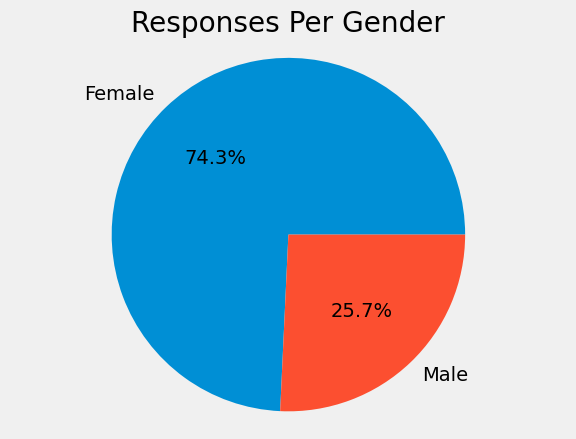

In [ ]:

# Code for percentage of male and female respondents comparing which had more respondents.
labels = respondents_per_gender['gender']
sizes = respondents_per_gender['num_respondents'].astype(float)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Responses Per Gender')
plt.axis('equal')
plt.show()


After finding out what percentage of students who have suffered and are currently suffering from a mental health issue.

We decided it would be beneficial to see the percentage breakdown of responses based on gender.

As our graphs in question one show there seems to be a majority of female responses.

In this graph we are able to see that there are 73.4% for female and 25.7% for male.

As a group we were not necessarily shocked to see these results based off of question one but we were suprised to see that more than one third of the responses came from female students.

### Q2:  How many students, for each gender suffer from each mental health disorder (anxiety, depression, panic attacks)?



In [ ]:
#Include a comment at the top explaining what the code is doing:  Here we select XXX...

#Also, be sure to include a comment explaining any non-obvious detail in your query.
#     For example, let's say you are getting the prices of all french wines in a DB and have a clause like
#     'WHERE price > 0'.  It may not be obvious to me why you are excluding this.  If you realzied that
#      "price=0" really means "unknown price", then tell me that in a comment.

In [ ]:
#This code selects each gender (male and female), which is then divided into two groups (those that suffer from anxiety vs. those who don't),
sql_statement = """
                SELECT gender, anxiety AS with_anxiety,
                       COUNT(*) AS num_students
                FROM mental_health
                GROUP BY gender, anxiety
                ORDER BY with_anxiety
                """
anxiety_per_gender = pd.read_sql_query(sql_statement, conn)
anxiety_per_gender

,gender,with_anxiety,num_students
0,Female,No,51
1,Male,No,16
2,Female,Yes,24
3,Male,Yes,10


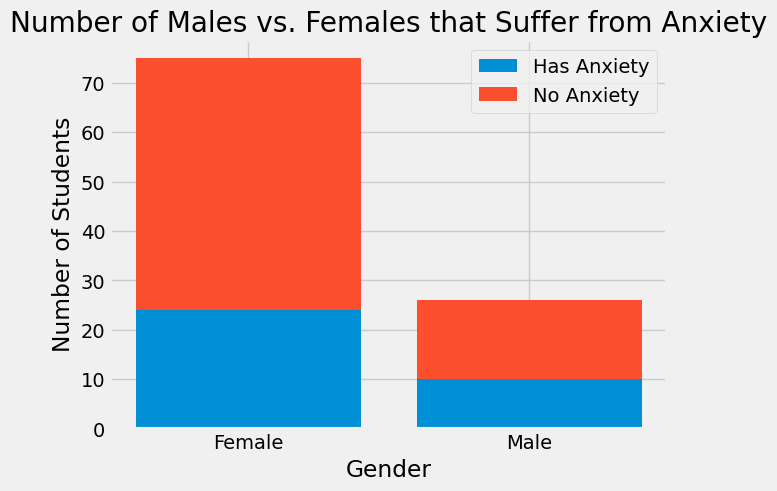

In [ ]:
#Code for creating a stacked bar graph, comparing each gender and how many for each gender suffer from anxiety
plt.bar(anxiety_per_gender["gender"].iloc[2:], anxiety_per_gender["num_students"].iloc[2:], label="Has Anxiety");
plt.bar(anxiety_per_gender["gender"].iloc[0:2], anxiety_per_gender["num_students"].iloc[0:2], bottom = anxiety_per_gender["num_students"].iloc[2:], label="No Anxiety");
plt.title("Number of Males vs. Females that Suffer from Anxiety")
plt.ylabel("Number of Students")
plt.xlabel("Gender")
plt.legend();




According to our data, 32% of female students and 38% of male students that partook in this survey stated that they suffer from an anxiety disorder. Due to the huge number disparity between the number of female vs. male students, it is possible that the number of male students that suffer from anxiety may or may not be exactly 38%.

In total with both genders, out of 101 students in the survery, roughly 33% (1/3) of students suffer from an anxiety disorder.

We then wanted to figure out the disparity between male and female students for depression.

In [ ]:
#This code selects each gender (male and female), which is then divided into two groups (those that suffer from depression vs. those who don't),
sql_statement = """
                SELECT gender, depression AS with_depression,
                       COUNT(*) AS num_students
                FROM mental_health
                GROUP BY gender, depression
                ORDER BY with_depression
                """
depression_per_gender = pd.read_sql_query(sql_statement, conn)
depression_per_gender

,gender,with_depression,num_students
0,Female,No,46
1,Male,No,20
2,Female,Yes,29
3,Male,Yes,6


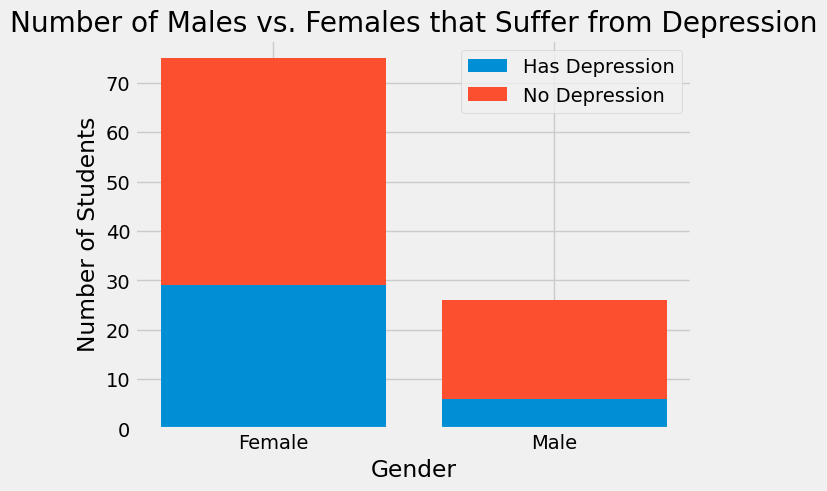

In [ ]:
#Code for creating a stacked bar graph, comparing each gender and how many for each gender suffer from depression
plt.bar(depression_per_gender["gender"].iloc[2:], depression_per_gender["num_students"].iloc[2:], label="Has Depression");
plt.bar(depression_per_gender["gender"].iloc[0:2], depression_per_gender["num_students"].iloc[0:2], bottom = depression_per_gender["num_students"].iloc[2:], label="No Depression");
plt.title("Number of Males vs. Females that Suffer from Depression")
plt.ylabel("Number of Students")
plt.xlabel("Gender")
plt.legend();




Interestingly, we found that there were a larger number of female students who suffered from depression than male students. 39% of female students out of 75 suffered from depression whereas only 23% out of 26 male students suffered from depression.

These results were a little surprising because we would have thought that due to mental health in young adults today, we would have assumed that males would suffer more from depression than females.

Going back to the previous graph that compared anxiety between male and female students, we would assume that females would suffer more from anxiety and males would suffer more from depression, but according to our results, it was reversed.

Finally, we wanted to finish comparing mental health disorders by figuring out the disparity for panic attack disorders between male and female students.

In [ ]:
#This code selects each gender (male and female), which is then divided into two groups (those that suffer from panic attacks vs. those who don't),
sql_statement = """
                SELECT gender, panic_attacks AS with_panic,
                       COUNT(*) AS num_students
                FROM mental_health
                GROUP BY gender, panic_attacks
                ORDER BY with_panic
                """
panic_per_gender = pd.read_sql_query(sql_statement, conn)
panic_per_gender

,gender,with_panic,num_students
0,Female,No,50
1,Male,No,18
2,Female,Yes,25
3,Male,Yes,8


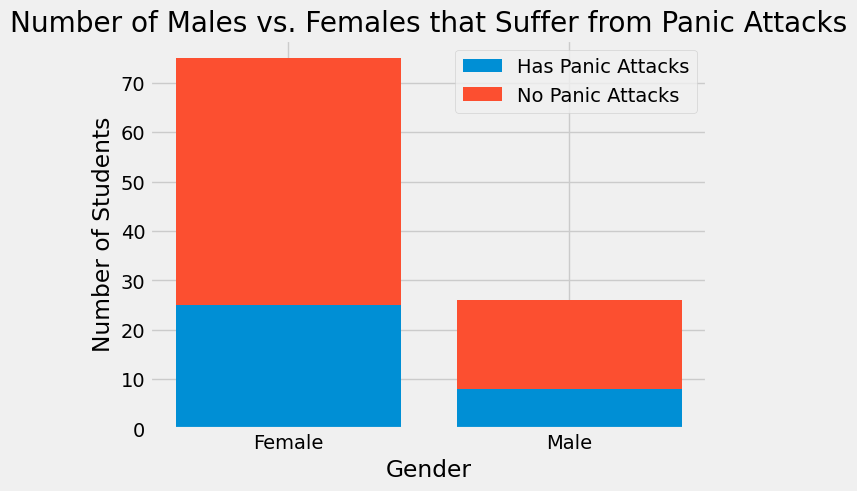

In [ ]:
#Code for creating a stacked bar graph, comparing each gender and how many for each gender suffer from depression
plt.bar(panic_per_gender["gender"].iloc[2:], panic_per_gender["num_students"].iloc[2:], label="Has Panic Attacks");
plt.bar(panic_per_gender["gender"].iloc[0:2], panic_per_gender["num_students"].iloc[0:2], bottom = panic_per_gender["num_students"].iloc[2:], label="No Panic Attacks");
plt.title("Number of Males vs. Females that Suffer from Panic Attacks")
plt.ylabel("Number of Students")
plt.xlabel("Gender")
plt.legend();




According to the graph above, exactly 1/3 female students suffer from panic attacks. For male students, roughly 31% suffer from panic attacks.

These results are very similar to results for the other two mental health disorders we decided to look into.

Overall, comparing the three mental health disorders between male and female students, the only noticeable trend we discovered was how very little male students suffered from depression. We would have expected that number to be just a little higher.

So the next question we asked ourselves is how many students from each department has the most students that suffer from anxiety.

### Q3:  Which major departments suffer most from an anxiety disorder?

In [ ]:
#The code below takes selects the given majors and then sorts them into the different Departments listed down below and then it counts the number of students
#It then groups by the departments and the anxiety and then finally orders it by the departments
sql_statement1 =  """
                    SELECT CASE
                           WHEN major IN('Engineering', 'Mathemathics', 'BCS',
                                         'KOE', 'BIT', 'IT', 'Human Sciences',
                                         'Marine science','Engine','koe', 'Psychology',
                                         'Communication','CTS') THEN 'STEM '
                           WHEN major IN('Nursing', 'Radiography', 'Biomedical science',
                                         'Diploma Nursing', 'MHSC') THEN 'Medical '
                           WHEN major IN('Islamic education', 'TAASL', 'Pendidikan Islam',
                                        'BENL') THEN 'Education'
                           WHEN major IN('Accounting', 'Banking Studies','Business Administration',
                                         'Human Resources', 'KENMS') THEN 'Buisness'
                           ELSE 'Other Majors'
                           END department_majors,
                           anxiety,
                           COUNT(*) AS num_students
                    FROM mental_health
                    --WHERE anxiety = 'Yes'
                    GROUP BY department_majors, anxiety
                    ORDER BY department_majors

                    """
department = pd.read_sql_query(sql_statement1, conn)
department

,department_majors,anxiety,num_students
0,Buisness,No,4
1,Buisness,Yes,1
2,Education,No,4
3,Education,Yes,2
4,Medical,No,8
5,Other Majors,No,15
6,Other Majors,Yes,8
7,STEM,No,36
8,STEM,Yes,23


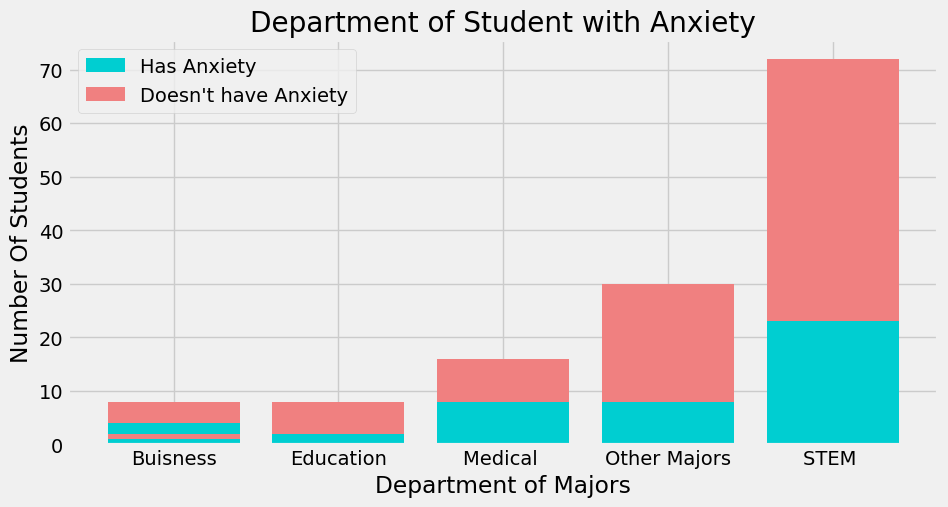

In [ ]:
#Here we create the bar graph to show the number of students that have anxiety and dont have anxiety from each department.
plt.figure(figsize=(10,5))
plt.bar(department['department_majors'].iloc[0:],department['num_students'].iloc[0:], color = 'darkturquoise', label = 'Has Anxiety', zorder = 2)
plt.bar(department['department_majors'].iloc[0:],department['num_students'].iloc[0:], bottom = department['num_students'].iloc[0:] ,color ='lightcoral', label = "Doesn't have Anxiety", zorder =2)
plt.grid(zorder = 1)
plt.xlabel("Department of Majors")
plt.ylabel("Number Of Students")
plt.title("Department of Student with Anxiety")
plt.legend();

So from our visulization we learned that 22% of students who suffer from anxiety majored in the STEM department whilst around 1% of students who are majored in the Buisness department have experienced less anxiety then others.


From our Code we learned that around 35% of students from the STEM department don't suffer from anxiety whilst 14% of students who study other majors dont suffer from depression .


The above picture made us wonder what GPA range are these students sitting at currently that are causing them to have mental issues.

### Q4:  What percentantage of students fall into each GPA range?


We wanted to find out the disparity between the GPA ranges for the students in the dataset.

In [ ]:
# This SQL code gets each GPA range group and calculates the percentage of the total students that fall into each GPA range group.
sql_statement = """
                SELECT gpa_range,
                       COUNT(*) / (SELECT COUNT(*) * 1.0
                                   FROM mental_health) AS percentage_of_students
                FROM mental_health
                GROUP BY gpa_range
                """
gpa_results = pd.read_sql_query(sql_statement, conn)
gpa_results

,gpa_range,percentage_of_students
0,0 - 1.99,0.039604
1,2.00 - 2.49,0.019802
2,2.50 - 2.99,0.039604
3,3.00 - 3.49,0.425743
4,3.50 - 4.00,0.475248


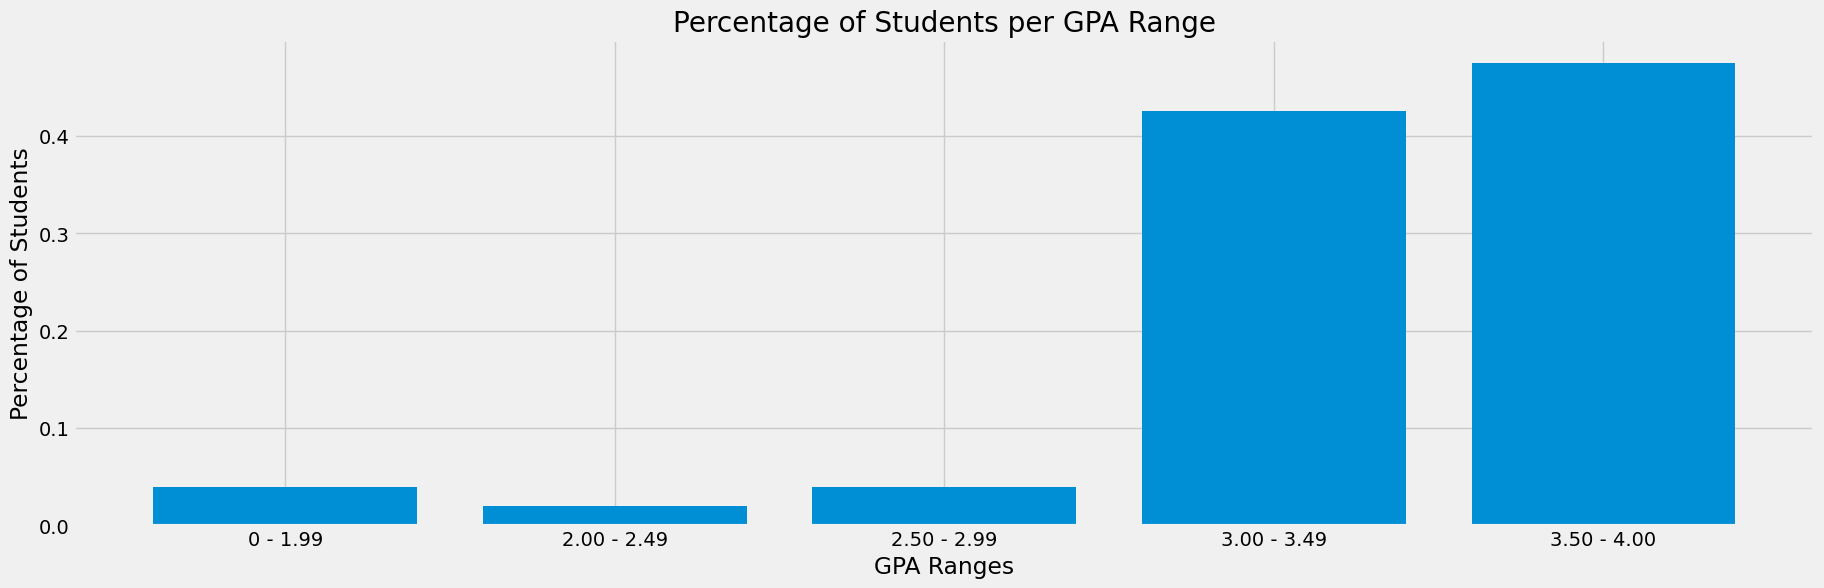

In [ ]:
plt.figure(figsize=(20,6))
plt.bar(gpa_results['gpa_range'], gpa_results['percentage_of_students'])
plt.xlabel("GPA Ranges")
plt.ylabel("Percentage of Students")
plt.title("Percentage of Students per GPA Range");

After looking at the graph, it seems that the majority of students in the dataset have at least a 3.0 GPA.

We wanted to ask a new question. We wanted to know if there was any correlation and/or trends between the time and date that each survey was recorded as well as how many people responded for each date and time over the course of the survey.

### Q5: Are there any noticeable trends or correlations between the date and time and the number of recorded responses?

In [ ]:
#This function converts a time string to a list of
# month, day, hours, year, and minutes since midnight
def get_time_elements(time): #'8/7/2020 12:02'

  time_list = time.split("/")
  day = time_list[0]
  month = time_list[1]
  time_list = time_list[2].split(" ")
  year = time_list[0]
  time_list = time_list[1].split(":")
  hours = time_list[0]
  min = time_list[1]
  seconds = 0
  min_since_midnight = (int(hours) * 60) + int(min)
  return int(month), int(day), int(year), hours, min, int(min_since_midnight)

#This function returns a new dataframe with expanded date information
# df is the dataframe of interest
# date_time_col_name is the name of the column with the date information
#       NOTE: THE TIME FORMAT MUST BE "8/7/2020 12:02" OR "8/7/2020 12:02:00"
def expand_date_time_col(df, date_time_col_name):

  df['date_time_new'] = df[date_time_col_name].apply(get_time_elements)
  expanded_date_df =  df['date_time_new'].apply(pd.Series).rename(columns = {0: 'month', 1: 'day', 2: 'year', 3: 'hour', 4: 'min', 5: 'min_since_midnight'})
  return pd.concat([datesToAge, expanded_date_df], axis = 1)

#example for how to run the expanded date time column method
#expand_date_time_col(datesToAge, 'date_time')

In [ ]:
#We wanted to select the date_time and age from the mental_health table.
#Then we had to do a little conversion from the previous code cell to group the
#day, year, month, and hour of each index as the "date_time" variable.
#Then we simply renamed the column of "date_time" to "num_entries"
#for clarity sake.
sql_statement = """
                SELECT date_time, age
                FROM mental_health
                """
datesToAge = pd.read_sql_query(sql_statement, conn)
datesToAge = expand_date_time_col(datesToAge, 'date_time')
numEntriesPerHour = datesToAge.groupby(by=['day', 'year', 'month', 'hour'], as_index=True).count()[["date_time"]]
numEntriesPerHour = numEntriesPerHour.reset_index()
numEntriesPerHour = numEntriesPerHour.rename(columns = {'date_time': 'num_entries'})
numEntriesPerHour


,day,year,month,hour,num_entries
0,8,2020,7,12,18
1,8,2020,7,13,11
2,8,2020,7,14,14
3,8,2020,7,15,13
4,8,2020,7,16,6
5,8,2020,7,17,4
6,8,2020,7,18,2
7,8,2020,7,19,2
8,8,2020,7,20,1
9,8,2020,7,21,1


The majority of recorded entries from the survery occured at the very start of when the survey opened up. To be more specific, around 55% of all participants responded within the first four hours of the survery opening up. We also noticed that there was a slight spike in participants on July 13 at 10am with 9 people responding in that hour.

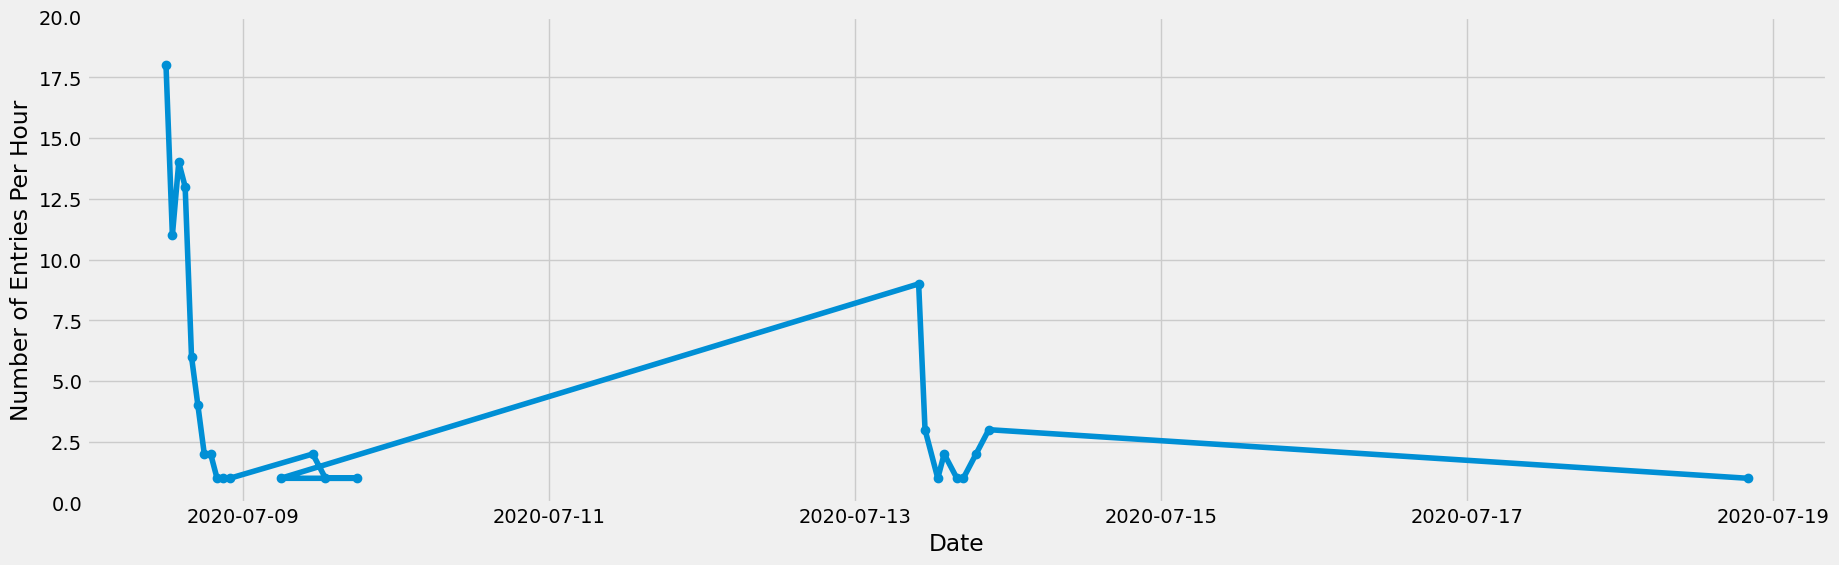

In [ ]:
#For the axis axis, we converted the day, year, month, and hour
#into one variable "date_time" by using the to_datetime command.
#We then did the standard procedure for setting up a line graph
#with little markers for each point in the data.
#We couldn't figure out why the line graph would revert back
#to a previous date, even though the time and date was in order
#from the previous cell.
numEntriesPerHour['date_time'] = pd.to_datetime(dict(day=numEntriesPerHour.day, year=numEntriesPerHour.year, month=numEntriesPerHour.month, hour=numEntriesPerHour.hour))
plt.figure(figsize=(20,6))
plt.plot(numEntriesPerHour['date_time'], numEntriesPerHour['num_entries'], marker = "o")
plt.ylim(0, 20)
plt.xlabel('Date')
plt.ylabel('Number of Entries Per Hour');

From the visualization above, we see that the highest recorded entries in a single hour occured during the beginning of when the survey started, around noon of July 8. We think it would make sense for a frontload of entries to come in at the beginning since that is when the survey would officially be open to the student body.

One interesting note that we also found that was mentioned previously was that there was a spike in responses on July 13. We couldn't think of any particular reason as to why there was a spike at that date and time. We just thought it was interesting to see when we saw the graph.

We also wanted to use a scatterplot for the same question, trying to discover to see if there was any correlation between the time and date, and the number of responses recorded.

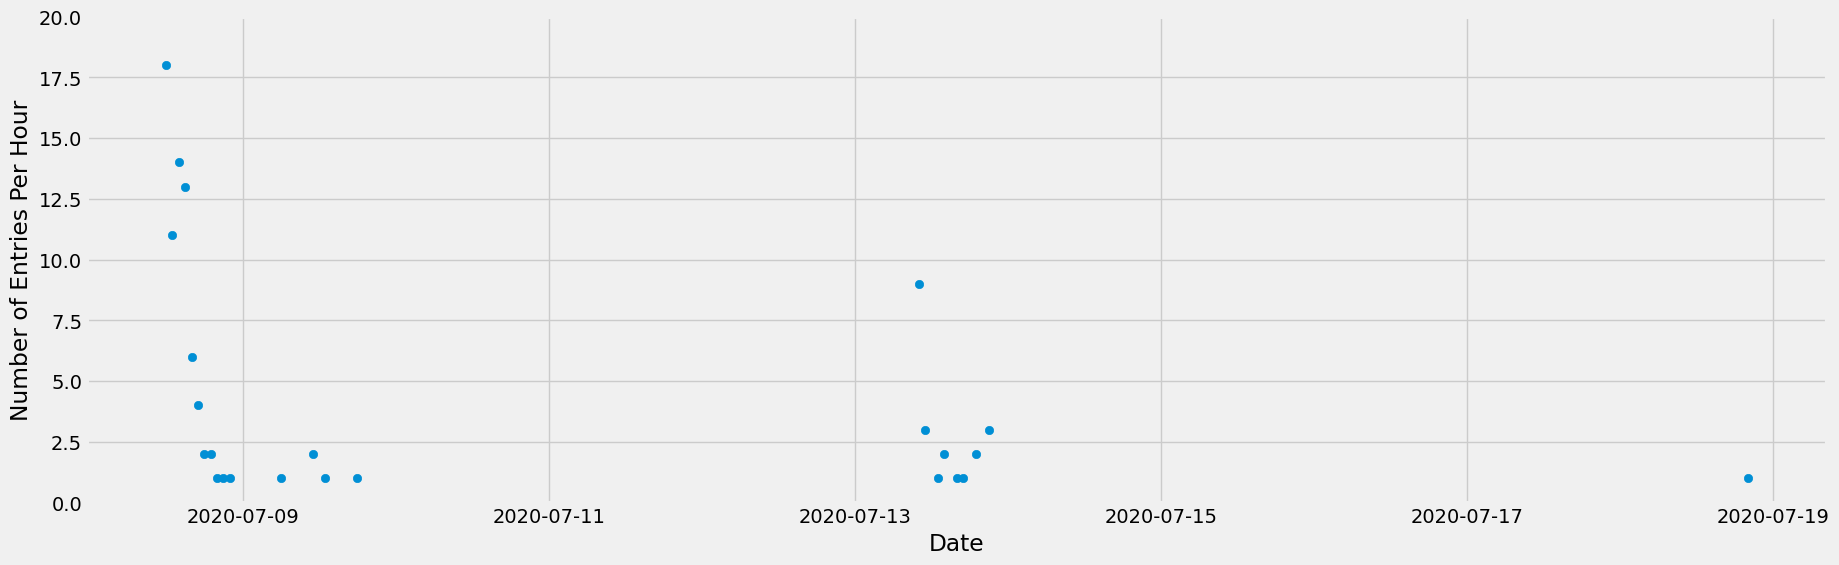

In [ ]:
numEntriesPerHour['date_time'] = pd.to_datetime(dict(day=numEntriesPerHour.day, year=numEntriesPerHour.year, month=numEntriesPerHour.month, hour=numEntriesPerHour.hour))
plt.figure(figsize=(20,6))
plt.scatter(numEntriesPerHour['date_time'], numEntriesPerHour['num_entries'], marker = "o")
plt.ylim(0, 20)
plt.xlabel('Date')
plt.ylabel('Number of Entries Per Hour');

In [ ]:
corr = numEntriesPerHour.corr()
corr

<ipython-input-24-89fecde5349e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = numEntriesPerHour.corr()


,day,year,month,num_entries
day,1.000000,NaN,NaN,-0.318156
year,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN
num_entries,-0.318156,NaN,NaN,1.000000


So from the correlation table from above, we discovered that there was a weak negative correlation (-0.32 to be exact) between the each day of the survey and the recorded number of responses for each day.

As each day passed, there was an overall slight decrease of responses that occured.

This would make sense as most people will complete the survey as soon as it would open up and as time passed, it would be unlikely that there would be another point in time where there would be a mass of responses coming in.

### Q6 : From of both our datasets, what is the total number of respondents that suffer from anxiety and are receiving treatment



In [ ]:
# Here in this code we are performing a join.
#The code is taking count of the total number of  people who responded 'yes' to having anxiety.
#Get the count of all respondents in the datasets and find who answered yes to having anxiety.
sql_statement = """
SELECT COUNT(*) AS num_people_with_anxiety
FROM mental_health mh
JOIN temp t ON mh.gender = t.Gender
WHERE mh.anxiety = 'Yes' OR mh.panic_attacks = 'Yes' OR mh.Treatment = 'Yes';








                """
mental_health_join = pd.read_sql_query(sql_statement, conn)
mental_health_join

,num_people_with_anxiety
0,2964


In [ ]:
# Here we are examining how many of the total respondents between both tables are seeking treatment for anxiety.

sql_statement = """
SELECT COUNT(*) AS num_people_with_treatment
FROM mental_health mh
JOIN temp t ON mh.gender = t.Gender
WHERE mh.Treatment = 'Yes';









                """
mental_health_join = pd.read_sql_query(sql_statement, conn)
mental_health_join

,num_people_with_treatment
0,344


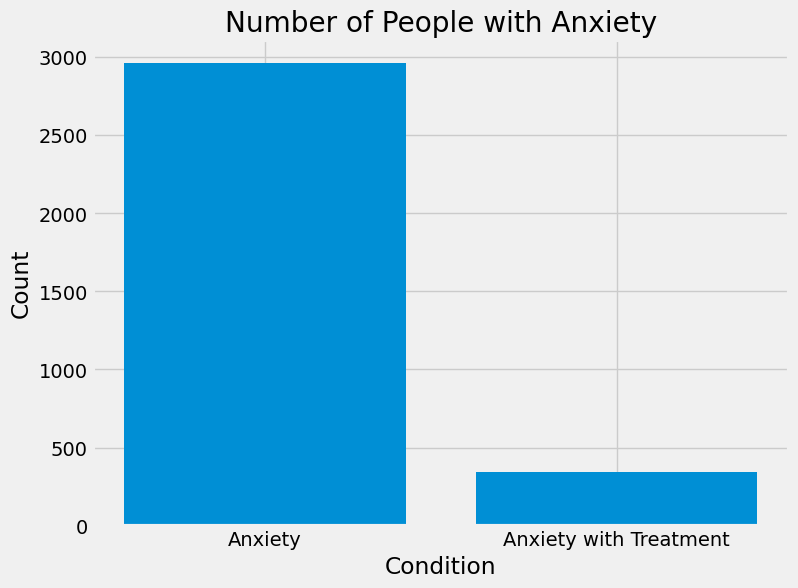

In [ ]:
# Define the data
count_anxiety = 2964
count_treatment = 344

# Define the plot parameters
plt.figure(figsize=(8, 6))
plt.bar(['Anxiety', 'Anxiety with Treatment'], [count_anxiety, count_treatment])
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Number of People with Anxiety')

# Show the plot
plt.show()







After performing our join we used to queries we first took a look at the total number of people reported having anxiety.
Then we took a look at of the people who reported having anxiety how many of them were getting treatment for it.
Our visualization shows that there is nearly 4000 respondents between both sets of data and only about 300 of the respondents are seeking treatment for anxiety.

### Q7: What percentage of students fall into these age categories

In [ ]:

#The code below selects the given age and the number of students
#and it seperates each student and places them in the given age category
sql_statement9 =  """
                    SELECT age ,COUNT(*) as num_students
                    FROM mental_health
                    WHERE AGE IS NOT NULL
                    GROUP BY age
                    """
age_group = pd.read_sql_query(sql_statement9, conn)
age_group

,age,num_students
0,18.0,32
1,19.0,21
2,20.0,6
3,21.0,3
4,22.0,2
5,23.0,13
6,24.0,23


From Our visulization we learned that about 30% of students are between the ages of 23 and 24. So we can assume they are probably Graduate students studying for a 5th or 6th year.

In [ ]:
num_rows = len(age_group)
multipliers = np.ones(num_rows) / num_rows  #Divide each of our 1's by n and multiply by 100
                                                  #so we can look at this on a 0-100 percent scale.
multipliers;

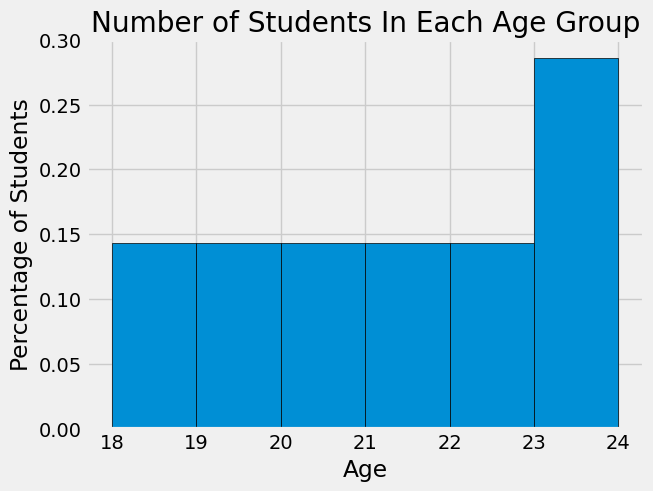

In [ ]:
#Here the code is displaying a Histogram of the percentages age group
plt.hist(age_group["age"], ec = 'black', bins = np.arange(18,25,1), weights = multipliers)
plt.title("Number of Students In Each Age Group")
plt.xlabel("Age")
plt.ylabel("Percentage of Students")
plt.xticks(np.arange(18,25,1));

---

## Conclusion

This section should summarize your findings and bring your write-up to a close.  You should also describe what additional questions you would like to consider if you had more time and what data could be incorporated to shed more light on your topic.

Overall, it seems that more than 50% of the students that were in the survey did not seem to suffer from a mental health related issue. The most common ages for particpants were between 23 and 24 years old according to the histogram of the number of students per age group.

We discovered that the students who were in STEM-related majors (science, technology, engineering, math) suffered the most from an anxiety disorder. Given the nature of the rigorous academic nature of those majors, we weren't very surprised to see that. However we were expecting the medical-related majors to be much higher than what was shown to us.

It would have been much more beneficial to our research if we were given more statistics to work with like what exact GPA each student had, rather than just the GPA ranges. It also would have been a little easier for us if the majors were condensed into a certain number of manageable categories.


In [ ]:
#Close the cursor and connection
conn.close()